# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

# Data Science's Capstone : Starbucks challenge

For this capstone, we have to study the given data from starbuks to gain further insights and to ceate models that could be deployed. The study will be structured as follow : 

1. [Project Definition : overview, problem statement and metrics](#1)

2. [Data evaluation and preliminary analysis](#2)

3. [Data cleaning](#3)

4. [Data Wrangling](#4)

5. [Data analysis](#5)

6. [Summary of analysis](#6)

7. [Feature engineering for modeling](#7)

8. [Model building, evaluation and hyperparameter tunning](#8)

9. [Discussion](#9)

10. [Conclusion](#10)

# Project Definition<a name="1"></a>

### Project Overview

The project is about analysing starbucks data of multiple users, to understand the effectiveness of three promotional offers , sent randomly to random users.
We were given three files containing informations about the offers, the transcripts of users interactions and informations about users them selfs.

**It's an experiment made over a period of 30 days** . During that period, starbuks **sent randomly without prior knowledge, one of three types of offers also randomly chosen**.

All of these offers **come with different configurations as with different periods of validity and have been shared with costumers in different ways**.

These offers are the following : 

* **BOGO (buy one get one free)**
* **Discount offer**
* **Informational offer**

These offers are sent randomly with the these caracteristics : 

* **type of offer ie BOGO, discount, informational**
* **minimum required spend to complete an offer**
* **reward given for completing an offer**
* **time for offer to be open, in days**
* **channels for obtaining offer**

The users to whom the offers were sent are described in the dataset by :

* **age of the customer**
* **date when customer created an app account**
* **gender of the customer (note some entries contain 'O' for other rather than M or F)**
* **customer id**
* **customer's income**

The interaction of each users with each offer if recieved, is registred in the transcript with these info :

* **record description (ie transaction, offer received, offer viewed, etc.)**
* **time in hours since start of test. The data begins at time t=0**
* **either an offer id or transaction amount depending on the record**

### Project Statement

Given the dataset, we want to understand  the caracterstics of our customers And how did they behave after receiving the offer (or not), if they made the transaction or not. These are the questions that will be answered during the analysis :

* **Were transactions higher or lower in term of count ?**
* **Which type of medium had the most transaction count ?**
* **How did gender, age, income  and days of registration of users vary in comparison with transactions ?**
* **how does the time of ineraction correlate with  the ammount of transactions done ?**
* **If we take the uper quartile and lower quartile of transactions, how does the population differ in terme of age/income/gender/days of registration?** 
* **does these offers makes any difference into transactions and if it's the case, which ones ?**


We also want to build a  model to classify the outcome of transaction based on the data (**transaction made -1, transaction not made -0**)

### Metrics

Since we are going to build a model to classify, we will be using either F1-score or accuracy. Accuracy can be used when the class distribution is similar while F1-score is a better metric when there are imbalanced classes as in the above case.

# Data evaluation and preliminary analysis<a name="2"></a>

We will first get closer to our data and check it how it looks like . We will proceed sequentialy with the three tables provided by starbucks 

In [53]:
# we first need to import the necessary libraries for opening files , visualizing data and ploting

import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [54]:
# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

### Portfolio

In [55]:
#lets read a random sample of the data
portfolio.sample(5)

,channels,difficulty,duration,id,offer_type,reward
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5


In [56]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
channels      10 non-null object
difficulty    10 non-null int64
duration      10 non-null int64
id            10 non-null object
offer_type    10 non-null object
reward        10 non-null int64
dtypes: int64(3), object(3)
memory usage: 560.0+ bytes


We have a total of 6 columns. 3 are numerical and 3 are object type. We have only 10 entries in total and no nulls for all columns. We cannot use the duplicated method since we have a column that is not hashable (channels).

In [57]:
portfolio.describe()

,difficulty,duration,reward
count,10.000000,10.000000,10.000000
mean,7.700000,6.500000,4.200000
std,5.831905,2.321398,3.583915
min,0.000000,3.000000,0.000000
25%,5.000000,5.000000,2.000000
50%,8.500000,7.000000,4.000000
75%,10.000000,7.000000,5.000000
max,20.000000,10.000000,10.000000


In [58]:
print('unique durations : ', list(portfolio['duration'].unique()))
print('unique difficulty : ', list(portfolio['difficulty'].unique()))
print('unique reward : ', list(portfolio['reward'].unique()))
print('unique offers : ', list(portfolio['offer_type'].unique()))

unique durations :  [7, 5, 4, 10, 3]
unique difficulty :  [10, 0, 5, 20, 7]
unique reward :  [10, 0, 5, 3, 2]
unique offers :  ['bogo', 'informational', 'discount']


* looking at unique values of duration, diffculty, reward and offers we get to know all the possible formulations of offers
* It contains different ids of offer, each given through a different channel . They have all different caracteristics like difficulty, duration and rewards.
* We notice multiple problems with the data that needs to be adressed : 

    * channels need to be separated from list structures 
    * column names need to change accordingly to facilitate futur merging 

### Profile

In [59]:
#lets read the header and info
profile.sample(5)

,age,became_member_on,gender,id,income
14735,58,20170810,F,97ec3a7c95174bab9b9c8053edd72975,100000.0
16077,40,20150401,M,124178989b474b3a9e8779885faaa0dc,80000.0
12630,118,20171005,None,f778f62ca6f9414782bfb35067060591,NaN
9561,41,20180123,M,9e7dc72c57bd4116afe26ff053425b2c,72000.0
942,65,20170129,F,91b8bd3486414b79a3cf714f2f63d51b,77000.0


In [60]:
#lets read the infos of the table
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
age                 17000 non-null int64
became_member_on    17000 non-null int64
gender              14825 non-null object
id                  17000 non-null object
income              14825 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.1+ KB


We have a total of 5 columns and 16999 entries. Three columns contains numerical data, while two contains object typed data. The gender and income columns contains some nulls. The date column is raw and should be transformed

In [61]:
#check the duplicated rows
profile.duplicated().sum()

0

We have no duplicated data in the dataset

In [62]:
# entries with false age come also with nulls in income and no gender
profile[profile['income'].isna()].head()

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN
6,118,20170925,None,8ec6ce2a7e7949b1bf142def7d0e0586,NaN
7,118,20171002,None,68617ca6246f4fbc85e91a2a49552598,NaN


In [63]:
profile[profile['age']!=118].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 1 to 16999
Data columns (total 5 columns):
age                 14825 non-null int64
became_member_on    14825 non-null int64
gender              14825 non-null object
id                  14825 non-null object
income              14825 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 694.9+ KB


The gender and income columns contains some nulls. We have no duplicated data in the dataset . Removing the 118 age entry fixes the issue.

In [64]:
#nones aside, we have three types of entries in the gender column
profile['gender'].value_counts()

M    8484
F    6129
O     212
Name: gender, dtype: int64

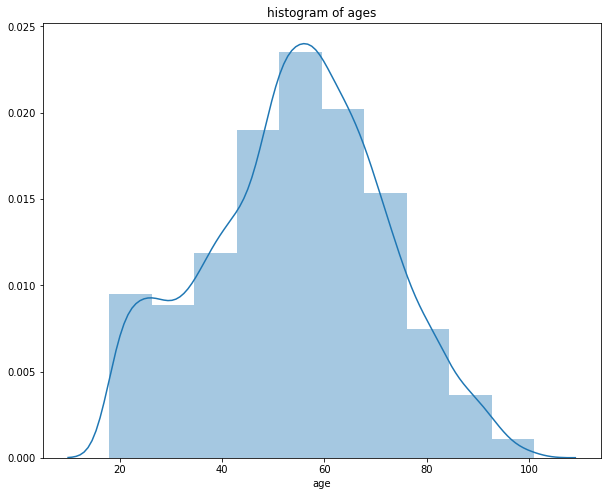

count    14825.000000
mean        54.393524
std         17.383705
min         18.000000
25%         42.000000
50%         55.000000
75%         66.000000
max        101.000000
Name: age, dtype: float64


In [65]:
#evaluate our age column if we remove the 118 entry

fig, ax =plt.subplots(figsize=(10,8))

sns.distplot(profile[profile['age']!=118]['age'], ax=ax, bins= 10, kde=True)

ax.set_title('histogram of ages')

plt.show()

#evaluate our age column if we remove the 118 entry
print(profile[profile['age']!=118]['age'].describe())

For the age we have mean age of 54 , a maximum of 101 and a minimum of 18. The histogram show almost no skewness that is confirmed with a mean almost equal to the median.

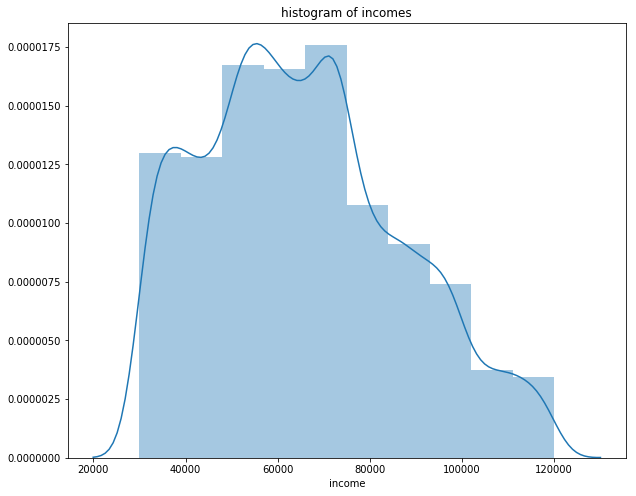

count     14825.000000
mean      65404.991568
std       21598.299410
min       30000.000000
25%       49000.000000
50%       64000.000000
75%       80000.000000
max      120000.000000
Name: income, dtype: float64


In [66]:
#evaluate our income column if we remove the 118 entry that comes with nans
fig, ax =plt.subplots(figsize=(10,8))

sns.distplot(profile[profile['age']!=118]['income'], ax=ax, bins= 10, kde=True)

ax.set_title('histogram of incomes')

plt.show()

print(profile[profile['age']!=118]['income'].describe())

The income column show a mean value of 65404, a minimum of 30000 and a maximum of 120000. The income show little skewness to the right , showed by a lower than the mean ( median equal to 64000)

* If we want to use this dataset, we have to fix some issues : 

    * we have a maximum of 118 in age and these entries occurs with null incomes, these need to be removed
    * the dates are raw time stamps that need to change into date time format. We can change the date to days of registration or hours. based on the difference with the latest registration.
    * column names need to change accordingly to facilitate futur merging 

### Transcript

In [67]:
#lets read the header of data
transcript.sample(5)

,event,person,time,value
186696,transaction,5c6ff1c1f3d04f08a414419119bbcb38,450,{'amount': 4.94}
144714,offer viewed,f3f6c8c262ff4a7eba241cc1d8c1836d,384,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
155146,offer received,b5e9fecfd7ff497cb3003b74277f9e5a,408,{'offer id': '3f207df678b143eea3cee63160fa8bed'}
22335,offer completed,9df2790f060d430e94f17189042e5671,24,{'offer_id': 'f19421c1d4aa40978ebb69ca19b0e20d...
65388,offer received,fdcb232e66d8452d9cd914e2770c9a00,168,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}


In [68]:
#lets read the info()
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
event     306534 non-null object
person    306534 non-null object
time      306534 non-null int64
value     306534 non-null object
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [69]:
#lets evaluate the unique values of event
print('unique events : ', list(transcript['event'].unique()))

unique events :  ['offer received', 'offer viewed', 'transaction', 'offer completed']


Here we have a different story, for each type of event (received / viewed/ transaction/ completed, we have the person that saw it , the time of action and the id of the offer.
We cannot use the duplicated method because non hashabale column and no nan is detected
The table is messy and it needs to be cleaned up. We need to group for each person, the offers he received, with each of them the info

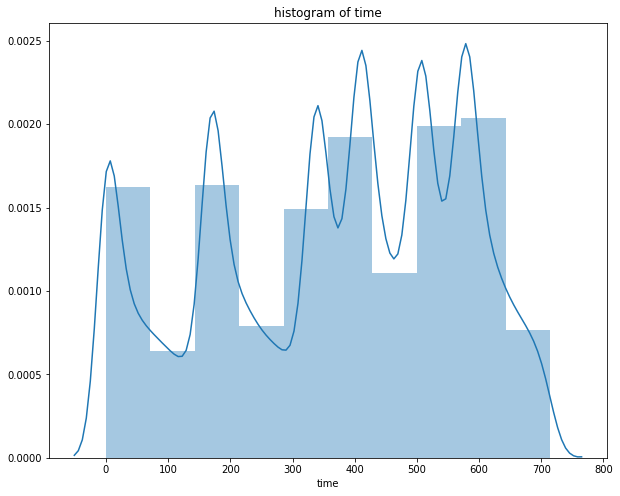

count    306534.000000
mean        366.382940
std         200.326314
min           0.000000
25%         186.000000
50%         408.000000
75%         528.000000
max         714.000000
Name: time, dtype: float64


In [70]:

fig, ax =plt.subplots(figsize=(10,8))

sns.distplot(transcript['time'], ax=ax, bins= 10, kde=True)

ax.set_title('histogram of time')

plt.show()

print(transcript['time'].describe())


the time column incate how long each user interacted with the offer, all the values might range from 0 all the way to 714. Its in hours and the mean time made for an offer is 366

The issues to fix are : 

* value column needs to be simplified from dictionary type.
* to group the as we need to do, the value column needs to be cleaned. From the info given to us, we have the amount of transaction , the offer id that pcreceeds it . These needs to be extracted from the dictionaries


# Data cleaning<a name="3"></a>

Now that we have a good grasp of the problems apearing within the data , lets clean these **defined** issues : 


* **portfolio**
    * channels need to be separated from list structures to dummied columns.
    * The offer type needs to be dummied.
    * column names need to change accordingly to facilitate futur merging 
    
* **profile**
    * we have a maximum of 118 in age and these entries occurs with null incomes, these need to be removed
    * the dates are raw time stamps that need to change into date time format. We can change the date to days of registration or hours. based on the difference with the latest registration.
    * gender needs to be dumy coded.
    * column names need to change accordingly to facilitate futur merging 
    
* **transcript**
    * to do that , obviously the value column needs to be simplified from dictionary type.
    * to group the as we need to do, the value column needs to be cleaned. From the info given to us, we have the amount of transaction , the offer id that pcreceeds it . These needs to be extracted from the dictionaries
    * We need to make a column of offer_id to group the ammounts and sum them up
    * time is in hours, lets change it to date and we need need to calculate the time of event  for each offer id instead of each step of it. It will be done by calculatin the max-mix time for each offer id .

### portfolio : clean

In [71]:
#make a function that extract the values from list for each value taken
def extract_vals_list(list_given):
    string_to_append=''
    for vals in list_given:
        string_to_append=string_to_append+vals+';'
        
    return string_to_append[:-1]

#use the function as lambda in the channels column
portfolio['channels']=portfolio['channels'].apply(lambda x: extract_vals_list(x) )


#dummy encode manuealy each of channels elements in a new column depending on channels content
portfolio['email']=np.where(portfolio['channels'].str.contains('email'),1,0)
portfolio['mobile']=np.where(portfolio['channels'].str.contains('mobile'),1,0)
portfolio['social']=np.where(portfolio['channels'].str.contains('social'),1,0)
portfolio['web']=np.where(portfolio['channels'].str.contains('web'),1,0)

#drop the channels column
portfolio=portfolio.drop(columns='channels')


# #dummy the offer type

portfolio=pd.concat([portfolio,pd.get_dummies(portfolio['offer_type'])],axis=1).drop(columns='offer_type')

#rename column id
portfolio.rename(columns={'id':'offer_id_merging'}, inplace=True)


#replace the column names and make them more readable 

portfolio.rename(columns={'email':'via_email','mobile':'via_mobile','social':'via_social','web':'via_web',
                'bogo':'type_bogo','discount':'type_discount','informational':'type_informational'},inplace=True)

### portfolio : test

In [72]:
portfolio.head()

,difficulty,duration,offer_id_merging,reward,via_email,via_mobile,via_social,via_web,type_bogo,type_discount,type_informational
0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,10,1,1,1,0,1,0,0
1,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,10,1,1,1,1,1,0,0
2,0,4,3f207df678b143eea3cee63160fa8bed,0,1,1,0,1,0,0,1
3,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,1,1,0,1,1,0,0
4,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,1,0,0,1,0,1,0


### profile : clean

In [73]:
#remove false entries with age 118
person_source=profile[profile['age']!=118]

#change the date column to date type data
person_source['became_member_on']=pd.to_datetime(person_source['became_member_on'].astype(str),format="%Y/%m/%d")

#rename the id to person_id
person_source.rename(columns={'id':'person_id'}, inplace=True)

#change the date to a specific number that we can use like total duration of membership


person_source['days_membership']=[(x-person_source['became_member_on'].min()).days for x in person_source['became_member_on'] ]

#drop the the columns of dates not needed anymore
person_source.drop(columns='became_member_on', inplace=True)

#dummy the gender and drop the main column
person_source=pd.concat([person_source,pd.get_dummies(person_source['gender'])],axis=1).drop(columns='gender')

#rename the columns for more readability

person_source.rename(columns={'F':'gender_F','M':'gender_M','O':'gender_O'},inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

### profile : test

In [74]:
person_source.head()

,age,person_id,income,days_membership,gender_F,gender_M,gender_O
1,55,0610b486422d4921ae7d2bf64640c50b,112000.0,1447,1,0,0
3,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,1380,1,0,0
5,68,e2127556f4f64592b11af22de27a7932,70000.0,1732,0,1,0
8,65,389bc3fa690240e798340f5a15918d5c,53000.0,1656,0,1,0
12,58,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,1566,0,1,0


### Transcript : clean

In [75]:
#rename value to offer_id and person to person_id
transcript.rename(columns={'value':'offer_id','person':'person_id'},inplace=True)

#Make function that extract dictionary values
def extract_val_dict(x):
    value=list(x.values())[0]
    return value

#use the function on transfricpt frame and specificaly value colum
transcript['offer_id']=transcript['offer_id'].apply(lambda x: extract_val_dict(x))


### Transcript : test

In [76]:
transcript.head()

,event,person_id,time,offer_id
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,offer received,e2127556f4f64592b11af22de27a7932,0,2906b810c7d4411798c6938adc9daaa5
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,fafdcd668e3743c1bb461111dcafc2a4
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,4d5c57ea9a6940dd891ad53e9dbe8da0


# Data wrangling<a name="4"></a>



We know that we have multiple cases in our dataset and each needs to be separated and treated differently. What i meant by that is that :


If we assume that all the offers were given randomly and reading it is the sole differentiating event seperating the control from the experiment group.

* **The data before all needs to be sorted per person and per offer and time**. This will help ensure that for each entry we wil clearly see how it was processed 

* All of the offers that should be taken into account in the experiment, should be valid in term of duration requirements. This means that any person's interaction needs to be done with the limits of required duration. **SO for that we need for each offer given to each person, calculate the difference of time betwen start and end of offer** .


* each customer was assigned a random type of offer , but we have two fundamentaly different type of offers:
    * **Informational** offers that doesnt require transaction and are merly informative
    * **BOGO and Discount** offers that are meant to incentivize user for buying or using the discount



* We also know that for offers that had transactions done, we need to **sum up all the money to estimate the amount of transactions given** , under the influence of a specific offer    



In [77]:
#we sort by person then by time
transcript=transcript.sort_values(by=['person_id','time'])

#we make a copy of offer_id
transcript['offer_id_merging']=transcript['offer_id']

#we make a custom number that replace any number related to transaction into nan, it will be ffiled later 
def replace_num_with_id(x):
    val=x
    if len(str(x))!=32:
        val=np.nan
    else:
        pass
    return val

#apply the function to the copied column
transcript['offer_id_merging']=transcript['offer_id_merging'].apply(lambda x: replace_num_with_id(x))

#ffill the nan replaced values in the copied column
transcript['offer_id_merging']=transcript['offer_id_merging'].ffill()

transcript.head()

,event,person_id,time,offer_id,offer_id_merging
55972,offer received,0009655768c64bdeb2e877511632db8f,168,5a8bc65990b245e5a138643cd4eb9837,5a8bc65990b245e5a138643cd4eb9837
77705,offer viewed,0009655768c64bdeb2e877511632db8f,192,5a8bc65990b245e5a138643cd4eb9837,5a8bc65990b245e5a138643cd4eb9837
89291,transaction,0009655768c64bdeb2e877511632db8f,228,22.16,5a8bc65990b245e5a138643cd4eb9837
113605,offer received,0009655768c64bdeb2e877511632db8f,336,3f207df678b143eea3cee63160fa8bed,3f207df678b143eea3cee63160fa8bed
139992,offer viewed,0009655768c64bdeb2e877511632db8f,372,3f207df678b143eea3cee63160fa8bed,3f207df678b143eea3cee63160fa8bed


We first create an offer id column to merge with other data after forward filling for each users. We then folow up by separating the info datasets that have their own rules, from bogo and discount

In [78]:
#to deal with our data we first need to sort the table
transcript=transcript.sort_values(by=['offer_id_merging','person_id','time'], ascending=True)

In [80]:
#lets get our grouped persons and offers id first

ids_grouped=transcript.groupby(['person_id','offer_id_merging'])['time'].mean().reset_index()[['person_id','offer_id_merging']]

#All of our calculations willl be done using groupby and we start by estimating the time for each offer process by each person

time_min=transcript.groupby(['person_id','offer_id_merging'])['time'].min().reset_index()['time']
time_max=transcript.groupby(['person_id','offer_id_merging'])['time'].max().reset_index()['time']

#calculate the difference of hours and divide by 24 for days
duration_done=(time_max-time_min)/24

#we calculate the transactions so for that we use offerid by replcnng the ids with 0 and suming during group

def function_toreplacewithzero(x):
    value=x
    try:
        value=float(value)
    except:
        value=0
        
    return value

transcript['transactions_done']=transcript['offer_id'].apply(lambda x: function_toreplacewithzero(x))

transaction_done_transcript=transcript.groupby(['person_id','offer_id_merging'])['transactions_done'].sum().reset_index()['transactions_done']


#now lets deal with the status of the offer from event and one hot encode them for further analysis

offer_encoding_transcript=transcript.groupby(['person_id','offer_id_merging'])['event'].apply(lambda x: ','.join(x)).reset_index()

offer_encoding_transcript['event_recieved']=np.where(offer_encoding_transcript['event'].str.contains('offer received'),1,0)
offer_encoding_transcript['event_transaction']=np.where(offer_encoding_transcript['event'].str.contains('transaction'),1,0)
offer_encoding_transcript['event_viewed']=np.where(offer_encoding_transcript['event'].str.contains('offer viewed'),1,0)
offer_encoding_transcript['event_completed']=np.where(offer_encoding_transcript['event'].str.contains('offer completed'),1,0)

offer_encoding_transcript.drop(columns='event',inplace=True)

offer_encoding_transcript.head()

,person_id,offer_id_merging,event_recieved,event_transaction,event_viewed,event_completed
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,1,1,0,1
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,1,0,1,0
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,1,1,1,0
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1


In [81]:
#lets stick back our id keys and concat all other generated goodies
transcript_merge=pd.concat([offer_encoding_transcript,
          transaction_done_transcript,
          duration_done],axis=1)

transcript_merge.head()

,person_id,offer_id_merging,event_recieved,event_transaction,event_viewed,event_completed,transactions_done,time
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,1,1,0,1,69.20,5.0
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,1,0,1,0,0.00,1.5
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,1,1,1,0,22.16,2.5
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1,8.57,2.0
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1,27.67,2.0


In [82]:

#We  merge the info of offers from the portfolio based on the offer_id
merge1=transcript_merge.merge(portfolio,on='offer_id_merging')

#We  finaly merge the info from person frame based on the person_id
final_table=merge1.merge(person_source, on='person_id')


In [83]:
#lets check our table structure now
final_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56751 entries, 0 to 56750
Data columns (total 24 columns):
person_id             56751 non-null object
offer_id_merging      56751 non-null object
event_recieved        56751 non-null int64
event_transaction     56751 non-null int64
event_viewed          56751 non-null int64
event_completed       56751 non-null int64
transactions_done     56751 non-null float64
time                  56751 non-null float64
difficulty            56751 non-null int64
duration              56751 non-null int64
reward                56751 non-null int64
via_email             56751 non-null int64
via_mobile            56751 non-null int64
via_social            56751 non-null int64
via_web               56751 non-null int64
type_bogo             56751 non-null uint8
type_discount         56751 non-null uint8
type_informational    56751 non-null uint8
age                   56751 non-null int64
income                56751 non-null float64
days_membership       5

Our final table showed aboved is much easier to use now . We have two main types of features :

* **Caracteristics of our users :** age/income/days_membership/gender
* **Caracteristics of the offer :** duration/reward/via_/type_/event_/transaction_done


We can see that two features can be used as dependent variables for classification or prediction of value : event_transaction, transaction_done.

The caracteristics of our users can be used to analyse the specificity of the individuals that we seek to study . ex : how does the transaction differs based on age, income ... and what factor influence the most on transaction.

The caracteristics of the offer can be used to analyse the difference between the offers that had the most success and/or to try predicting the outcome based on the caracteristics of the offer.

We also can just use all of these and predict/classify our dependent variable.

**before starting**:

Before starting to do some EDA on the clean dataset, we will need to filter only the cases with time of usage is less than the duration required. This will lead to a dataset with 40774 entries instead of 56751

We also will need to remove some columns that will not be in use later on in our analysis:
* via_email: all of the users obtained the msg via email, why bother puting it in the data set
* the ids : all the data has been merged so why keeping them ?


In [84]:
final_table_timefiltred=final_table[final_table['time']<=final_table['duration']].drop(columns=['offer_id_merging',
                                                                                               'person_id','via_email'])

# Data analysis<a name="5"></a>

When we started our current project, we had some questions to ask . These should be answered durring our analysis, one after the other:

* **Were transactions higher or lower in term of count ?**
* **Which type of medium had the most transaction count ?**
* **what combination of event made the most transaction count?**
* **How did gender, age, income  and days of registration of users vary in comparison with transactions ?**
* **how does the time of ineraction correlate with  the ammount of transactions done ?**
* **If we take the uper quartile and lower quartile of transactions, how does the population differ in terme of age/income/gender/days of registration?** 
* **does these offers makes any difference into transactions and if it's the case, which ones ?**

**Were transactions higher or lower in term of count ?**

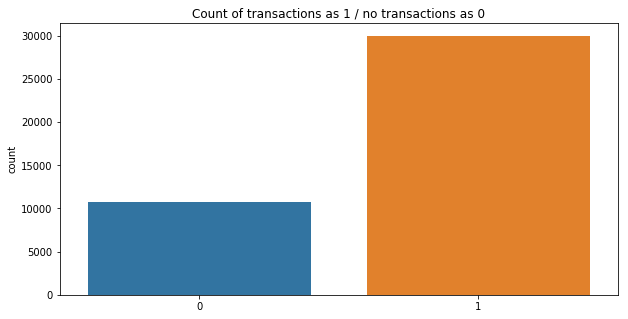

1    29994
0    10780
Name: event_transaction, dtype: int64


In [85]:
fig,ax= plt.subplots(figsize=(10,5))


sns.countplot(final_table_timefiltred['event_transaction'],ax=ax)

ax.set_title('Count of transactions as 1 / no transactions as 0')

ax.set_xlabel('')


plt.show()

print(final_table_timefiltred['event_transaction'].value_counts())

The number of transactions are more than double the entries with no transactions, we can see it with 29994 transactions done against 10780 entries with no transaction
The dataset is highly unbalanced

**Which type of medium had the most transaction count ?**

In [86]:
count_frame=final_table_timefiltred[['via_mobile','via_social','via_web']].melt()
count_frame['count']=1
count_frame.groupby(by=['variable','value']).sum()

count
variable   value       
via_mobile 0       4717
           1      36057
via_social 0      16867
           1      23907
via_web    0       7484
           1      33290

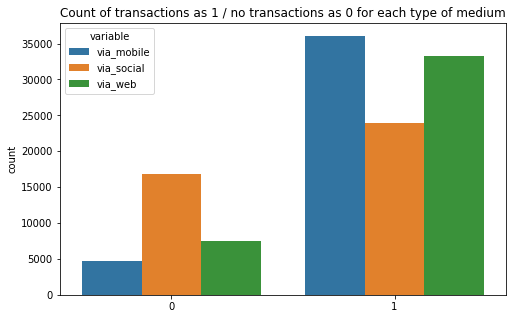

In [87]:
fig,ax= plt.subplots(figsize=(8,5))


sns.countplot(data=final_table_timefiltred[['via_mobile','via_social','via_web']].melt(),x='value',hue='variable')

ax.set_title('Count of transactions as 1 / no transactions as 0 for each type of medium')

ax.set_xlabel('')


plt.show()

Looking at the numbers and the plot, we see that evryone has recieved emails, so it shouldnt be accounted during any further analysis. 

For users who made transactions, Mobile users were the most prominent, folowed by web users and then social users. 

This looks good at first glance but there is a catch. These are overlapping numbers. We should be checking which specific combination of medium had most transactions.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


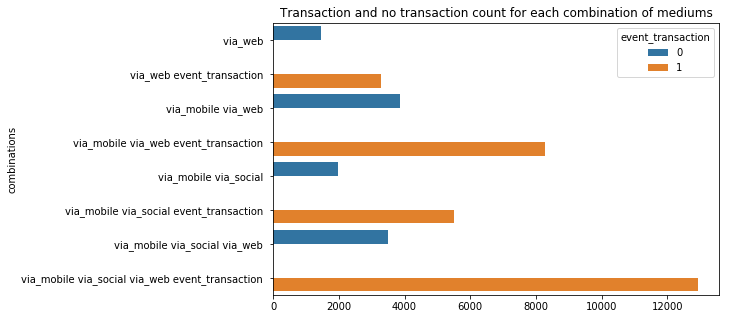

In [88]:
#lets write a function that count the number of all possible combinations of dummied features in a frame
list_tocompare=['via_mobile','via_social','via_web']




def combinations_dummies_frame(list_tocompare, value_comparewith):
    '''
    Function that does a combinations counting based ona  list of values to compare. These should be dumied in a frame .
    The combinations will be compared to a value 
    
    Input:
        list_tocompare: list of values for which all the combinations will be counted
        value_comparewith: the value to compare with all of the combinations 
    output :
        Plot giving the count of the value compared with for each combination
    '''
    
    if value_comparewith not in list_tocompare:
        
        list_tocompare.append(value_comparewith)
    
    count_frame=final_table_timefiltred[[x for x in list_tocompare]]
    count_frame['count']=1
    count_frame2=count_frame.groupby(by=[x for x in list_tocompare]).count().reset_index()
    empty_list=[]


    for i in range(0,len(count_frame2)):
        enpty_list2=''
        for idx,value in zip(count_frame2.iloc[i,:len(list_tocompare)].index,count_frame2.iloc[i,:len(list_tocompare)]):
            if value==1:
                enpty_list2=enpty_list2+str(idx)+' '
            else: 
                continue
        empty_list.append(enpty_list2) 


    to_plot=pd.concat([pd.Series(empty_list,name='combinations'),count_frame2['count'],count_frame2[value_comparewith]],axis=1)

    fig,ax= plt.subplots(figsize=(8,5))


    sns.barplot(data=to_plot,y='combinations',x='count',hue=value_comparewith, ax=ax)

    ax.set_title('Transaction and no transaction count for each combination of mediums')

    ax.set_xlabel('')


    plt.show()
    
    

combinations_dummies_frame(list_tocompare,'event_transaction')

Now we can answer in a better way. Users who recieved offers via email, mobile, social and web  made the most transactions, folowed by users with email, mobile and web.

The two last in order are users who recieved via email, mobile and social, folowed by users recieving via email and web

**what combination of event made the most transaction count?**

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


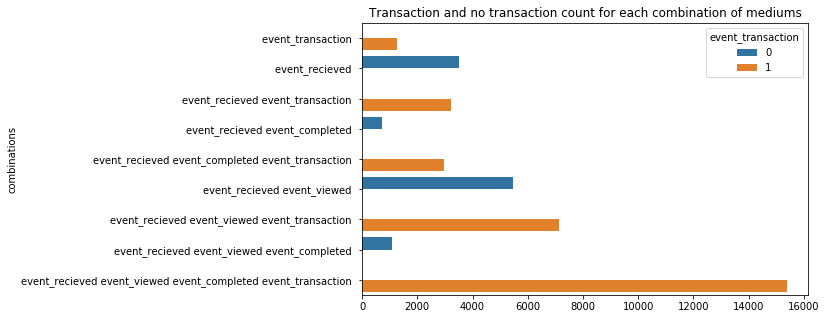

In [89]:
list_tocompare=['event_recieved','event_viewed','event_completed','event_transaction']

combinations_dummies_frame(list_tocompare,'event_transaction')

Most of transactions were made by users who completed all the four conditions.

**How did gender, age, income  and days of registration of users vary in comparison with transactions done or not ?**

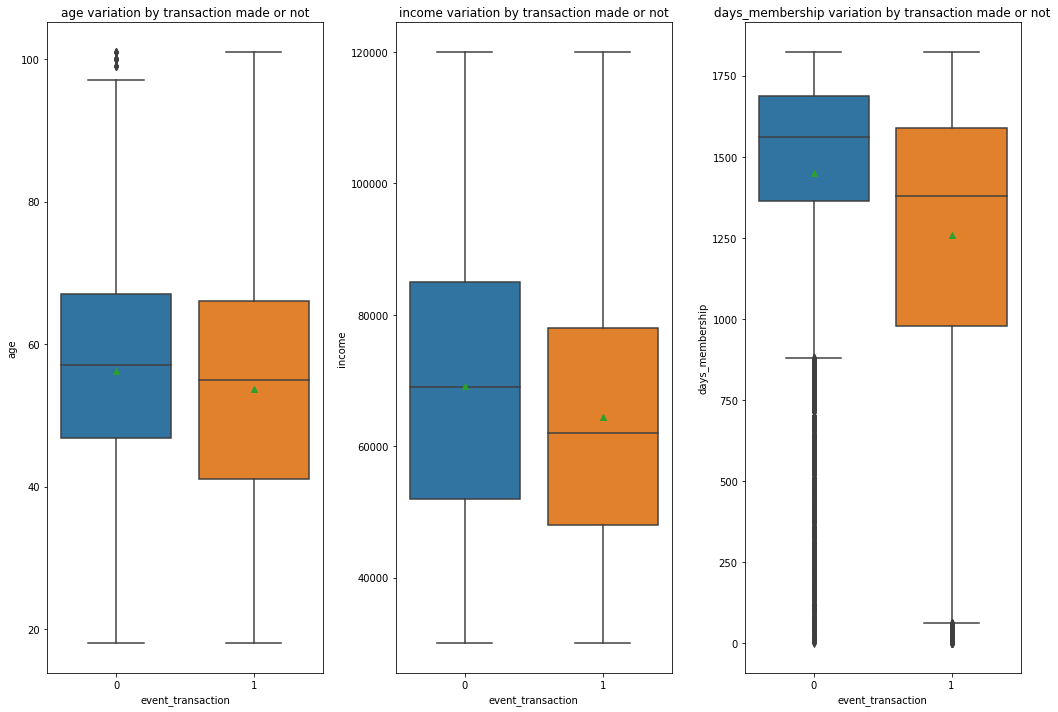

In [90]:
list_columns=['age','income','days_membership']

def multiple_boxplot_plot(frame, list_columns, compare_by_value,hue=None):
    
    '''
    Function that plot multiple boxplots to compare between binary state for each feature (exemple : how age vary for 
    transactions made or not)
    
    Input:
        frame: the frame based on what the ploting will be done
        list_columns: the list of columns names to do comparaison on
        compare_by_value: binary state to compare with our selected values in the list
        hue: default is none but if given it will be further split based on another feature
    output:
        multiple boxplots comparing values for each state and for each feature
    '''
    
    fig,axes= plt.subplots(nrows=1,ncols=len(list_columns),figsize=(15,10))
    
    for idx, value in zip(range(len(list_columns)),list_columns):
        
        sns.boxplot(ax=axes[idx],data=frame,
                    x=compare_by_value,y=value,showmeans=True,hue=hue)  
        axes[idx].set_title('{} variation by transaction made or not'.format(value))
        
    plt.tight_layout()
    
    
multiple_boxplot_plot(final_table_timefiltred,list_columns,'event_transaction')

So we notice that the mean age of users who made the transaction is lower than the ones that did not, and also with a wider range of values
Also the mean income of the population who did make the transaction is also lower, with almost the same range of values in term of income
Here again, the mean days of membership of users who made the transactions is lower , and we also have a wider range of values for these users

**how does the time of ineraction correlate with  the ammount of transactions done ?**

Since we want to check how the does time vary with ammount of transactions, we will use a scatter plot to see how is the relationship

In [91]:
#select only the data we want to work with in a new table
table1=final_table_timefiltred[['time','transactions_done']]

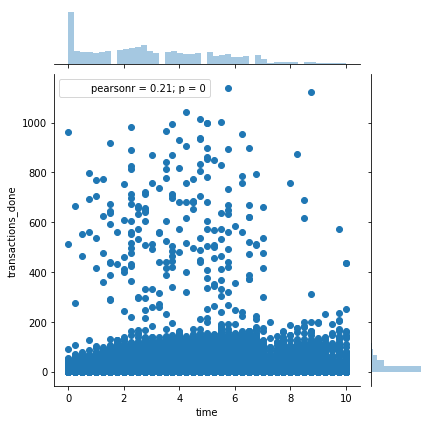

In [92]:
sns.jointplot(data=table1,x='time',y='transactions_done')

plt.show()

We can see that we that we have a non linear relationship that we cant get much out of it . But we also notice that we have outliers in the data. Looking at it , we see that most of our data lie in the limit under 200 $ , and only few data points scattere randomly above.

We probably will need to treat the dataset from outliers .


We also clearly can see it looking at the histograms that are highly skewed for both features

In [93]:
#Lets use the robust scaler to rescale the data and by minimising effect of outliers
from sklearn.preprocessing import RobustScaler

#instantiate the scaler
scaler=RobustScaler()

#fit and transform the table
scaled_data=scaler.fit_transform(table1)

#creat a dataframe and take the columns names since the scaler remove the names
analysis_frame=pd.DataFrame(scaled_data,columns=table1.columns)

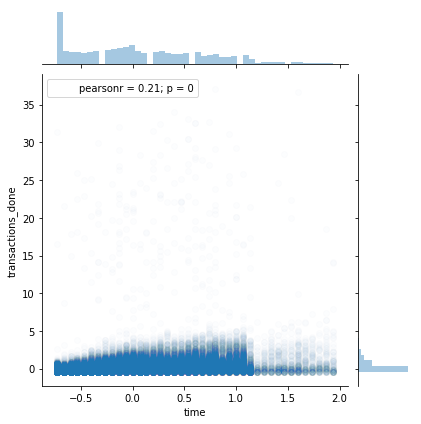

In [94]:
#ploting the data using the jointplot framework
sns.jointplot(data=analysis_frame,x='time',y='transactions_done',alpha=0.01)

plt.show()

Looking at the plot, we clearly can see that the distributions are still affecting the plot,. They are highly skewed . We will need to recenter the data using some transformations method and redo the scaling.

Looking at this, we might try the log transform.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


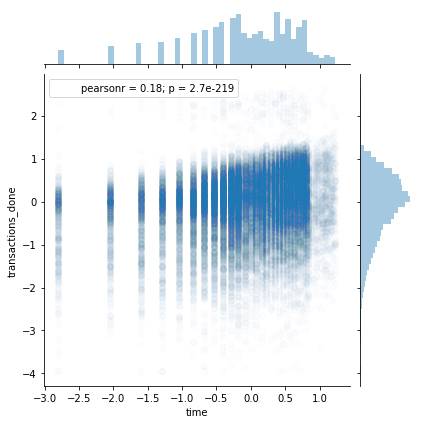

In [95]:
table1=np.log(table1).replace([np.inf, -np.inf], np.nan).dropna()

scaler=RobustScaler()

scaled_data=scaler.fit_transform(table1)

analysis_frame=pd.DataFrame(scaled_data,columns=table1.columns)

sns.jointplot(data=analysis_frame,x='time',y='transactions_done',alpha=0.01)

The log transform do gather our data in a more centred way and less spread out. And we can see that the log transformed version of time and transactions, show a slight positive linear relationship if we look at the densest spot in the plot . What if we transform only transactions.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


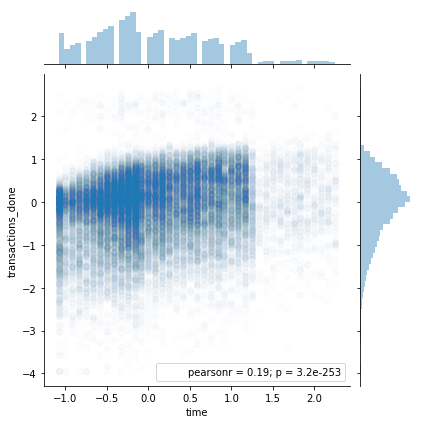

In [96]:
table1=final_table_timefiltred[['time','transactions_done']]


table1['transactions_done']=np.log(table1['transactions_done'])

table1=table1.replace([np.inf, -np.inf], np.nan).dropna()

scaler=RobustScaler()

scaled_data=scaler.fit_transform(table1)

analysis_frame=pd.DataFrame(scaled_data,columns=table1.columns)

sns.jointplot(data=analysis_frame,x='time',y='transactions_done',alpha=0.01)

plt.show()

For both cases we have a positive pearsonr value of around 0.18 , and a small p value, indicating a significant relationship 

**If we take the uper quartile and lower quartile of transactions, how does the population differ in terme of age/income/gender/days of registration?** 

In [97]:
final_table_timefiltred_copy=final_table_timefiltred.copy()

final_table_timefiltred_copy['transactions_done']=np.log(final_table_timefiltred_copy['transactions_done']+1)

In [98]:
Q1=final_table_timefiltred_copy['transactions_done'].quantile(0.25)
Q3=final_table_timefiltred_copy['transactions_done'].quantile(0.75)
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR

table_analysis_upqartile=final_table_timefiltred_copy.loc[final_table_timefiltred_copy['transactions_done']>=Q3]
table_analysis_lowerquartile=final_table_timefiltred_copy.loc[final_table_timefiltred_copy['transactions_done']<=Q1]

In [99]:
table_analysis_upqartile['quartile']='upper'
table_analysis_lowerquartile['quartile']='lower'

up_lower_forplot=pd.concat([table_analysis_upqartile,table_analysis_lowerquartile],axis=0)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


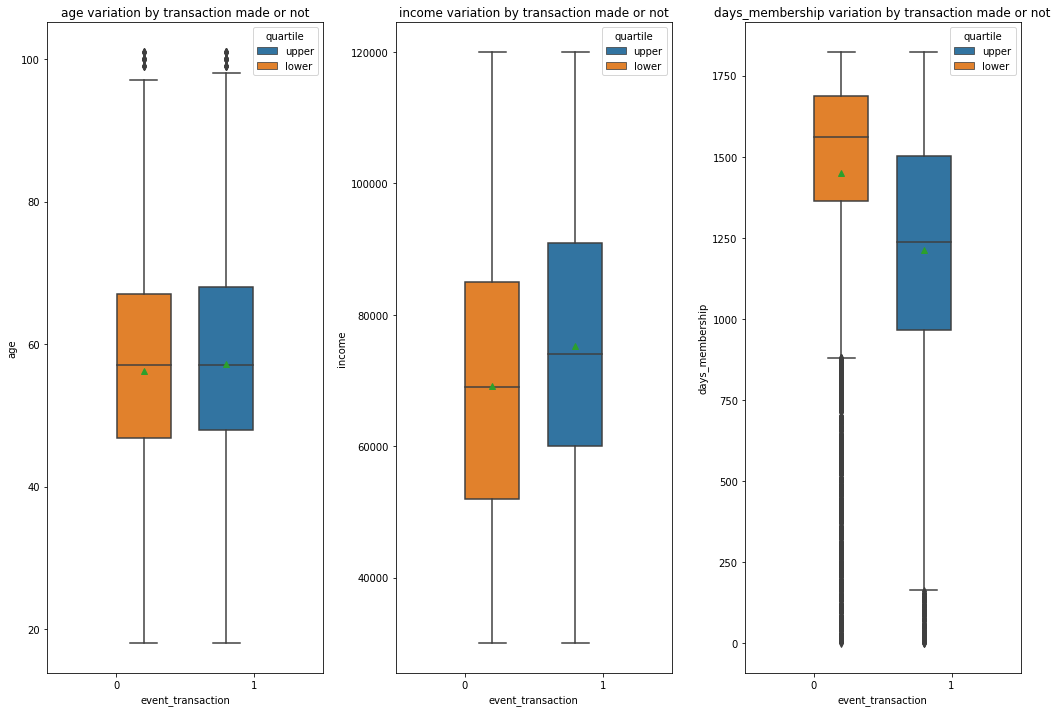

In [100]:
list_columns=['age','income','days_membership']
multiple_boxplot_plot(up_lower_forplot,list_columns,'event_transaction','quartile')

Looking at the boxplots we can clearly see that the lower quartile of transctions made have a popuplation that have a smaller mean income, a higher mean days of membership and an equal mean age incomparison to the upper quartile.

The upper one has less mean days of membership and higher mean income.

What about gender ?

In [101]:
#calculate the ration female/male count, if the value is higher than one, it means that females are more prominent

sex_ratio=table_analysis_upqartile['gender_F'].mean()/table_analysis_upqartile['gender_M'].mean()
sex_ratio

1.146895074946467

In [102]:
sex_ratio=table_analysis_lowerquartile['gender_F'].mean()/table_analysis_lowerquartile['gender_M'].mean()
sex_ratio

0.7408681408681409

This is clearly showing that there might be a a higher tendence for females in the population that made higher transactions values .
The male population is higher count in the lowerquartile of the transactions made

**does these offers makes any difference into transactions and if it's the case, which ones ?**

Since its reminicent to an anova test setup with our treatments as either informational, bogo or discount we should first check the assumptions of anova. First one is that for each group, we have a normal distribution

In [103]:
#lets import all of the necessary libraries 
from scipy import stats
import statsmodels.api as sm


#lets subset the dataset for analysis
frame_analysis=final_table_timefiltred[['type_discount','type_informational','type_bogo','transactions_done']]

#lets write a loop that check for each of our values and do a shapiro test
types_list=['type_discount','type_informational','type_bogo']

alpha = 0.05

for type_val in types_list:

    w, pvalue = stats.shapiro(frame_analysis[frame_analysis[type_val]==1]['transactions_done'])
    if pvalue > alpha:
        print('Normal distribution (fail to reject H0)')
        
    else:
        print('Not normal distribution (reject H0)')
    print(w, pvalue)

Not normal distribution (reject H0)
0.39713072776794434 0.0
Not normal distribution (reject H0)
0.35874003171920776 0.0
Not normal distribution (reject H0)
0.3723856806755066 0.0


/opt/conda/lib/python3.6/site-packages/scipy/stats/morestats.py:1653: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The test of normality didnt give good results so we will use to make use of non parametric aproaches

In [104]:
#we will need the kruskal library to perform a non parametric aproach
from scipy.stats import kruskal


#we start the kurskal by giving the three variables datasets
stat, p = kruskal(frame_analysis[frame_analysis['type_discount']==1]['transactions_done'],
                  frame_analysis[frame_analysis['type_informational']==1]['transactions_done'],
                  frame_analysis[frame_analysis['type_bogo']==1]['transactions_done'])


print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('At least one of the feature is significantly different (reject H0)')

Statistics=693.254, p=0.000
At least one of the feature is significantly different (reject H0)


The non parametric aproach tells us that there is at least one type of offer which is significant in term of transactions. but which one ? for the sake of interpretability we will use a simple logistic regression and a linear regression to see the statistical summary and conclude the overall strenght of each offer

In [105]:
#lets create our features frame and add an intercept. We also need to drop the column for baseline
X=final_table_timefiltred[['type_informational','type_bogo','type_discount']].iloc[:,1:]

X['intercept']=1

#we create our target feature in a single dataframe
y=final_table_timefiltred['event_transaction']

#We instantiate the logit model and fit it
model=sm.Logit(y,X)
results=model.fit()

#print the summary of our regression
results.summary2()

Optimization terminated successfully.
         Current function value: 0.573088
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit             No. Iterations:   5.0000    
Dependent Variable: event_transaction Pseudo R-squared: 0.008     
Date:               2021-09-22 13:22  AIC:              46740.1463
No. Observations:   40774             BIC:              46765.9937
Df Model:           2                 Log-Likelihood:   -23367.   
Df Residuals:       40771             LL-Null:          -23551.   
Converged:          1.0000            Scale:            1.0000    
-------------------------------------------------------------------
                  Coef.   Std.Err.     z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
type_bogo         0.5309    0.0314  16.8857  0.0000  0.4693  0.5925
type_discount     0.5768    0.0310  18.6153  0.0000  0.5161  0.6375
intercept         0.5671    0.0256  22.1111  0.0000  0.5169  0.6174
==================================================================

"""

In [106]:
#we exponentiate the coeficient to obtain the multiplicative of odds
(np.exp(0.5309),np.exp(0.5768))

(1.7004620359703591, 1.7803322425420858)

Looking at this , we can say that using the offer discount, it is 1.78% more likely to get a transaction holding all other variables constant, in comparaison with informative offers. And bogo will give only 1.70% more likely to get a transaction holding all other variables constant, in comparaison with informative offers

# Summary of analysis<a name="6"></a>

* The number of transactions are more than double the entries with no transactions, we can see it with 29994 transactions done against 10780 entries with no transaction


* Users who recieved offers via email, mobile, social and web  made the most transactions, folowed by users with email, mobile and web.


* the mean age of users who made the transaction is lower than the ones that did not, and also with a wider range of values


* Also the mean income of the population who did make the transaction is also lower, with almost the same range of values in term of income


* Here again, the mean days of membership of users who made the transactions is lower , and we also have a wider range of values for these users


* slight positive linear relationship between time of interactions and transactions done. It might show that it didnt play much as a factor


* the lower quartile of transctions made have a popuplation that have a smaller mean income,


* there might be a a higher tendence for females in the population that made higher transactions values



* using the offer discount, it is 1.78% more likely to get a transaction holding all other variables constant, in comparaison with informative offers. And bogo will give only 1.70% more likely to get a transaction holding all other variables constant, in comparaison with informative offers

# Feature engineering for modeling <a name="7"></a>

Predicting based on this dataset can be tricky. We have multiple features and thus we might have some strong colinearity that we will need to fix.

We also will need to scale the dataset depending on what type of model we will apply , and what target we will try to predict : either a classification on the event_transaction or a regression on transactions_done

If interpretability is not an issue, one might think about the randomforect classifier. 

We can use a test train split method and check the performance using the ROC curve. But first, lets build our dataframes.

In [108]:
#lets build our features and target dataset

X=final_table_timefiltred.drop(columns=['transactions_done',
                                     'event_transaction','event_completed','time'])
y=final_table_timefiltred['event_transaction']

In [111]:
print('features are: ', list(X.columns))
print('target is: event_transaction')

features are:  ['event_recieved', 'event_viewed', 'difficulty', 'duration', 'reward', 'via_mobile', 'via_social', 'via_web', 'type_bogo', 'type_discount', 'type_informational', 'age', 'income', 'days_membership', 'gender_F', 'gender_M', 'gender_O']
target is: event_transaction


Now we need to analyse the features them selfs and select the ones that are going to be usfull to us lets start by doing a quick correlation plot

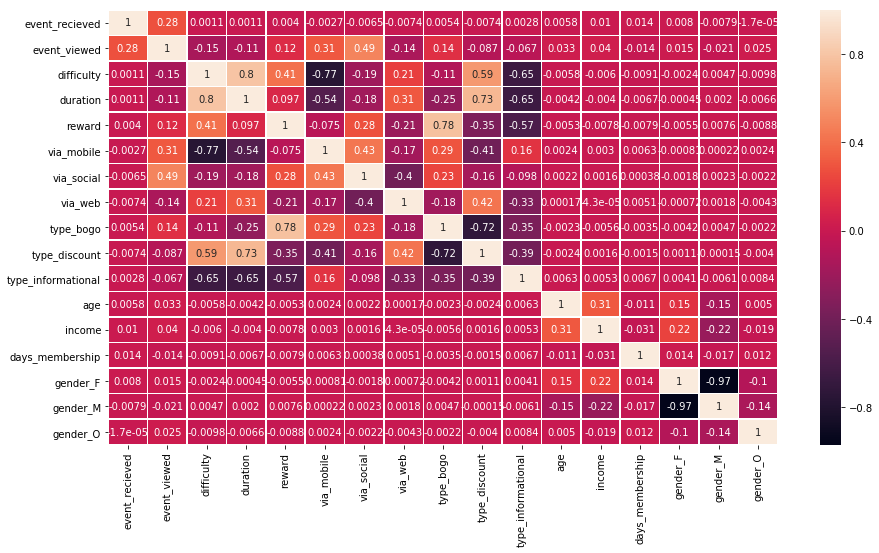

In [112]:
#we plot a heat map to show the values
fig,ax=plt.subplots(figsize=(15,8))

sns.heatmap(X.corr(),annot=True,linewidths=0.5)

plt.show()

Looking at this we can see that some features are indeed corelated, either negativly or positivly. For instance we have duration highly correlated with difficulty (normal !) and we have the type values that are negatively correlated between each other since having one dicate that you dont have the other two

Lets calculate the VIF to check for colinearity

In [113]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) \
                   for i in range(len(X.columns))]

vif_data.sort_values(by='VIF',ascending=False)

/opt/conda/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
8,type_bogo,inf
9,type_discount,inf
15,gender_M,inf
14,gender_F,inf
10,type_informational,inf
16,gender_O,inf
2,difficulty,34.856132
4,reward,17.585148
5,via_mobile,8.677249
3,duration,5.313674


lets use another approach to look at the importance of the features 


In [114]:
#lets select the most important features to avoid using unecessary features using f classif and mutual info
from sklearn.feature_selection import f_classif
f, p = f_classif(X, y)


from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X, y)


pd.DataFrame({'Feature': X.columns,'F': f,'MI': mi}).sort_values(
 ['MI','F'], ascending=False).style.bar(subset=['F','MI'],color='blue')

,Feature,F,MI
13,days_membership,1722.64,0.0326173
0,event_recieved,476.994,0.016212
2,difficulty,60.7896,0.011932
1,event_viewed,797.989,0.0107674
4,reward,116.233,0.00913239
12,income,383.511,0.00873968
3,duration,173.738,0.00685718
6,via_social,379.684,0.00473392
7,via_web,0.00943696,0.00435193
11,age,161.355,0.00410192


We have indeed perfect  colinearity. As we said, for gender, only two are enough , no need for a column for each type. Same goes for type because its only one of them.

Mutual info and F suggest that type_bogo and gender M or F needs to be removed. 

Duration is highly correlated with several features as we have seen before and event recieved is kind of unecessary since if its viewed , it is recieved

age is also very low and via_mobile looks that it have low F

In [115]:
X_droped=X.drop(columns=['type_bogo',
                         'type_informational',
                         'via_web','difficulty',
                         'gender_M','event_recieved',
                         'duration','via_mobile','age'])

In [116]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_droped.columns
vif_data["VIF"] = [variance_inflation_factor(X_droped.values, i) \
                   for i in range(len(X_droped.columns))]

vif_data.sort_values(by='VIF',ascending=False)

,feature,VIF
4,income,7.166252
5,days_membership,6.545977
0,event_viewed,4.427773
2,via_social,3.427163
1,reward,2.981022
3,type_discount,1.870635
6,gender_F,1.811914
7,gender_O,1.025362


We have now 8 features and a VIF under 10 for all of them .



# Model building, evaluation and hyperparameter tunning<a name="8"></a>


Lets now effectivly build our model ! we will use the Random Forest Classifier

In [123]:
#we import the necessary library to perform the train test split

#as a reminded , we have double the amount of transaction made over no transactions
# we need to stratify our dataset
from sklearn.model_selection import train_test_split

#lets split the dataset into training and test set
X_train,X_test,y_train,y_test=train_test_split(X_droped,y,test_size=0.30,stratify=y)

#lets homogenize the scale of the dataset

#we import the necessary library 
from sklearn.preprocessing import MinMaxScaler

#we instantiate the minmaxscaller
scaler = MinMaxScaler()

#fit_transform on the training but only transform the testing set
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#lets import the the RF classifier library
from sklearn.ensemble import RandomForestClassifier

#we instantiate the classifier
clf=RandomForestClassifier()


#we fit the model to the training data
clf.fit(X_train, y_train)

#we predict using the model fit
y_pred=clf.predict(X_test)

#we preliminarly check the accuracy score
from sklearn.metrics import f1_score

print('accuracy score is : {}'.format(f1_score(y_test,y_pred)))

accuracy score is : 0.7865870363267766


The obtained accuracy is 78% . We need to do a gridsearch to identify the best parameters


In [124]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [10, 50, 100],
    'max_features': [2, 3],
    'n_estimators': [100, 200]
}
# Create a based model
clf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 0, scoring='f1')

#fit the gridsearch on training data
grid_search.fit(X_train, y_train)

#print the best parameters
grid_search.best_params_

#extract the best gridsearch
best_grid = grid_search.best_estimator_

In [125]:
y_pred=best_grid.predict(X_test)

print('New accuracy score is : {}'.format(f1_score(y_test,y_pred)))

New accuracy score is : 0.8461236506378803


We have a 6 % increase in term of accuracy just by playing around with some paramters

Before going, lets just check the most important features during the classification

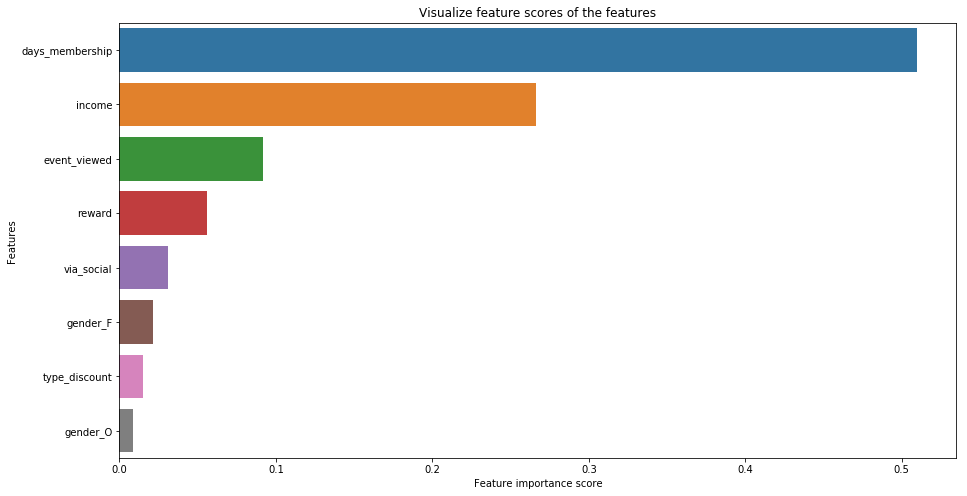

In [122]:
#get the feature importance from the best grid
feature_scores = pd.Series(best_grid.feature_importances_,
                           index=X_droped.columns).sort_values(ascending=False)

#plot a bar plot of feature importances
f, ax = plt.subplots(figsize=(15, 8))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

# Justification and discussion<a name="9"></a>

Well! it seems that days of membership is important , followed by income ! Lets sum this up in the discussion

So what did we get from all of this analysis ?  We could say that starbucks could just concentrate it offer by giving more discount, to young females with high income ! sounds so easy ? its data speaking (my methodology might be wrong, but thats what i could get out from it). But based on the model , Sex doesnt play much of a role in prediting the outcome of transactions

We  notice that days of membership plays instead an important role in the prediction of the transaction event. This imply that the discounts should be focused mostly on the most loyal customers given the main target population.

Long interactions with offer didnt play much as a role apparently, and looking at the data , starbuks can probably focus on sharing its offers via email, social media, mobile and web . This process alone show how effective it is to bombard a customer with ads , making him unknowingly think that it's a necessary offer that needs to be taken.

When we have done our non parametric analysis, it showed that the offer discount , is slightly more likely to give rise to transactions. This means that starbuks can focus on giving more discount as they are more likely to help


# Conclusion and further opportunities for developpement <a name="10"></a>

**Reflection :**

This work shows that starbuks can probably focus on discount on the specific population that we describe. Predicting on only 7 of the rescaled feature, helps to predicts the outcome of transaction with a precision of 70% .


**Improvement**
Though this work might look incomplete, there is room for a lot of imporvements:

* Try several other algorithms for classification
* Try a regression appreach on the transactions done
* Do some elaborate Hypothesis testing and inference since we have an experiment setup that should be leveraged.
* Compare the classical aproaches with NN and DNN to see if we have any improvement.
* Try probably a simple regression aproach on the caracteristics of users and see how much can it explain the target variable


AS for me, this notebook helped me to practice and apply so much ! I still have a lot to learn and **thank you udacity** !!